**Глеб, привет!**

Меня зовут Анна Кузьмина, я буду проверять твой проект. Предлагаю общаться на «ты», но если тебе не комфортно — напиши мне и мы перейдем на «вы». Моя цель помочь тебе сделать этот проект еще лучше, что бы его можно было смело добавить в твое портфолио.

Для удобства я буду выделять комментарии разными цветами, вот так:

<div class="alert alert-danger">
<b> Красный цвет ❌</b>

По таким комментариям нужно будет поправить недочеты, без этого я не смогу принять твою работу.
    
</div>

<div class="alert alert-warning">
<b> Желтый цвет ⚠️ </b>
    
В таких комментариях я отмечу то, на что стоит обратить внимание в будущем. По-желанию ты можешь применить мои советы уже в этой работе.

</div>

<div class="alert alert-success">
<b> Зеленый цвет ✅ </b>
    
Так я отмечу твои удачные решения и все остальные комментарии.

</div>

При повторном ревью я буду выделять комментарии такими же цветами, только подпишу их так: «Комментарий ревьюера 2».


Предлагаю общаться в диалоге. Будет отлично, если ты, отвечая на мои комментарии или что-то изменяя в работе, добавишь свой комментарий, например так:

<div class="alert alert-info">
<b> Комментарий студента</b>

Проект доработан по твоим комментариям, но у меня есть вопрос...
</div>

Пожалуйста, не перемещай и не удаляй мои комментарии,это может увеличить время повторной проверки.

## Исследование данных о российском кинопрокате



<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Хорошо, что есть название, можно добавить цель работы и информацию об источниках исходных данных — это помогает сразу понять в чем суть исследования.
    
Что бы после обучения можно было добавлять проект в портфолио, лучше не просто копировать описание проекта из задания, а написать цели и задачи своими словами: «В данной работе мы будем изучать рынок...». То же касается и пояснений по ходу выполнения.

</div>

<div class="alert alert-info">
Спасибо, что так быстро проверила проект!

<div class="alert alert-info">
Заказчик этого исследования — Министерство культуры Российской Федерации.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

<div class="alert alert-success">
<b> Комментарий ревьюера 2 ✅ </b>

Цели и информация об исходных данных есть.

</div>

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def percent_null(df):  # функция для подсчета пропусков и их процентного соотношения
    name_column = []
    count_value = []
    percent = []
    for i in df.columns:
        name_column.append(i)
        count_value.append(df[i].isnull().sum())
        percent.append(int(df[i].isnull().sum() * 100 / len(df[i])))
    data = pd.DataFrame({'name' : np.array(name_column), 
                         'count': np.array(count_value), 
                         'percent' : np.array(percent)})
    print(data)

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Очень удобно когда импорт всех библиотек и настроек формата вывода данных, используемых в проекте, сохраняют в одной ячейке в начале проекта. Если по ходу работы над проектом потребуется импортировать еще какие-то библиотеки, то можно их добавить в эту ячейку и перезапустить, без повторного чтения файлов и других преобразований.

</div>

Получение предъварительных данных о датасетах

In [2]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_movies.info()
data_movies.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1641,Ведьмы из Сугаррамурди,121026313,2013-10-15T12:00:00.000Z,Художественный,"Энрико Керезо Продюксьонес Синематографикас, Л...",Испания - Франция,Алекс де ла Иглесиа,"Энрике Кересо, Франк Рибьер, Вернан Фредиани",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"комедия,приключения,фэнтези"
5440,Бабушка легкого поведения,111005817,2017-08-17T12:00:00.000Z,Художественный,"ООО ""Вайс Филмс""",Россия,М. Бальчюнас,"ООО ""Вайс Филмс""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,комедия
808,Самая одинокая планета /По рассказу Тома Биссе...,121024412,2012-10-01T12:00:00.000Z,Художественный,"Флайн Мун Филмпродакшн, Партс энд Лэйбор, Ван ...",США - Германия,Джулия Локтев,"Хэльге Альберс, Мари-Тереза Гуирис, Ларс Надсе...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.6,триллер
6995,Амели,121014919,2019-07-20T12:00:00.000Z,Художественный,"Клоди Оссар Продюксьон, Юнион Женераль Синемат...",Франция - Германия,Жан-Пьер Жене,"Клоди Оссар, Хельмут Бройер, Бастиан Грис",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия"
5729,Муми-Тролли и зимняя сказка,124000418,2018-02-15T12:00:00.000Z,Анимационный,Глобал Генезис Груп,Финляндия - Польша,"Якуб Вронски, Ира Карпелан","Ира Карпелан, Том Карпелан, Петр Щепанович",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.0,"мультфильм,фэнтези,комедия"
5624,Город кошек,126001417,2017-11-30T12:00:00.000Z,Прочие,Термит Филмз,Турция - США,Джейда Торун,"Илан Арболеда, Чарли Вупперманн, Джейда Торун",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,документальный
6695,Снегоуборщик,121001119,2019-02-07T12:00:00.000Z,Художественный,СтудиоКанал,Великобритания,Ханс Петтер Муланд,"Финн Гьердрум, Стейн Б.Квае",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.1,"боевик,триллер,драма"
1373,Холодное сердце. Конь-огонь,124004013,2013-11-29T12:00:00.000Z,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пик...",США,"Крис Бак, Дженнифер Ли",Питер Дел Вечо,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма
4037,Святой Джон из Лас-Вегаса,121016810,2010-09-09T12:00:00.000Z,Художественный,"Циркл оф Конфьюжн, Инди Вест Пикчерз, Олив Продс",США,Хью Родс,"Марк Бартон, Келли МакКормик, Лоуренс Матис, М...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.6,"драма,комедия"


In [3]:
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
data_shows.info()
data_shows.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
340,111007113,2400.00
3087,126006016,354757.00
2074,121022818,9629162.00
517,111011514,11960.00
474,111010014,900.00
157,111003419,421571.50
1658,121014717,13686591.00
1956,121020817,9702077.00
1012,121002216,6754350.01
1676,121015018,20325794.01


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
   
Здесь можно заметить, что количественные данные `box_office` выводятся в неудобном для чтения экспоненциальном формате, это можно исправить, применив метод:
    
`pd.options.display.float_format = '{:.2f}'.format`
    
Лучше всего разместить строку кода с настройками формата вывода в первой ячейке вместе с импортами библиотек, что бы эти настройки действовали для всех ячеек проекта.

</div>

<div class="alert alert-info">
Спасибо за информацию, а есть ли возможность настроить вывод чисел сразу с делением на разряды, например не 1000000, а 1 000 000?

<div class="alert alert-success">
<b> Комментарий ревьюера 2 ✅ </b>
   
Для деления на разряды можно указать запятую, вот так:
    
`pd.options.display.float_format = '{:,.2f}'.format`

</div>

Необходимо осуществить объединение датафреймов с использованием метода merger, однако, чтобы это сделать необходимо тип данных в колонке puNumber привести к одному типу данных. Я привету его к object, так как производить математические операции с индивидуализирующим номером бессмысленно.

In [4]:
data_shows['puNumber'] = data_shows['puNumber'].astype('str')
data_movies['puNumber'] = data_movies['puNumber'].astype('str')
df = data_movies.merge(data_shows, 
                       on='puNumber', 
                       how='left'
                       )
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6848,Подселенцы,126000819,2019-04-09T12:00:00.000Z,Прочие,"Нутз Продакшнз, Кан Израиль Паблик Броадкастин...",Великобритания - Израиль,Айрис Заки,Айрис Заки,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2512,Новейший завет,121006716,2016-03-25T12:00:00.000Z,Художественный,"Терра Инкогнита Филмз, Апре лё Делюж, Климакс ...",Бельгия - Франция - Люксембург,Жако ван Дормель,"Жан-Ив Асселин, Жако ван Дормель, Дэвид Клейкенс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"фэнтези,комедия",NaN
2165,Заложник /По мотивам романа Роберта Крэйса/.,221008915,2015-04-01T12:00:00.000Z,Художественный,"Мирамакс, Хостадж Эл Эл Си, Стрэйтус Филм Комп...",США - Германия,Флоран Сири,Хулио Фернандес,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"боевик,триллер,драма",NaN
6067,Моё поколение (My Generation),126001218,2018-08-16T12:00:00.000Z,Прочие,"Сиксти Сикс Пикчерз, 19 Интертейнмент",Великобритания,Дэвид Бэтти,"Майкл Кейн, Дик Клемент, Джеймс Клэйтон, Фодла...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"документальный,история",5251755.5
1094,"Приходи, как есть",121016112,2012-07-09T12:00:00.000Z,Художественный,Фобик Филмз,Бельгия,Жофрей Энтховен,"Аста Филпот, Мариано Ванхооф",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"драма,комедия",NaN


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Столбцы приведены к одному типу данных. Объединение выполнено.
    
</div>

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

При объединении датафреймов важно не потерять часть данных, поэтому обычно после объединения выполняют проверку. Для этого можно сравнить сколько было значений по столбцу `box_office` в исходном датафреме и сколько их попало в объединенный. Если ты уже сделал эту проверку, то просто поясни словами.
    
</div>

<div class="alert alert-info">
По условию необходимо объедините данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. Я так понимаю нет необходимости сохранять все данные из mkrf_shows. 

In [5]:
print(data_movies.shape)
print(data_shows.shape)
df.shape

(7486, 15)
(3158, 2)


(7486, 16)

<div class="alert alert-info">
Все данные из data_movies (mkrf_movies) вошли в новый датасет. Из data_shows (mkrf_shows) имеет смысл сохранять информацию только для тех фильмов, которые есть в data_movies.

<div class="alert alert-success">
<b> Комментарий ревьюера 2 ✅ </b>
    
Хорошо, что ты выполнил проверку. Но можно дополнительно проверить все ли фильмы представленные в `mkrf_shows` есть в `data_movies`. 
    
Для этого проверим сначала не дублируются ли номера прокатных удостоверений в `mkrf_shows`:
    
`mkrf_shows['puNumber'].duplicated().sum()`
    
Убедившись, что дубликатов нет, можем считать, что у нас 3158 уникальных фильмов, которые должны попасть в объединенную таблицу.
    
Что бы найти строки с фильмами из `mkrf_shows` в объединенной таблице (я ее назову `df`)  используем метод [isin()](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html?highlight=isin#pandas.Series.isin), а потом посчитаем количество попавших уникальных фильмов применив метод [nunique()](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html?highlight=nunique#pandas.Series.nunique):
    
`df.loc[df['puNumber'].isin(mkrf_shows['puNumber']), 'puNumber'].nunique()`
    
Полученное число должно быть не меньше 3158.
    
</div>

In [6]:
# df['year'] = pd.DatetimeIndex(df['show_start_date']).year
# print(df.value_counts('year'))
# df_box_office = df[~(df['box_office'].isna())]
# df_box_office_non = df[df['box_office'].isna()]
# print(df_box_office_non.value_counts('year'))
# pivot_box_office = df_box_office.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
# print(pivot_box_office)

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
    
В тренажере есть дополнительный спринт «Полезные инструкции для учебы» тема «Оформление проекта» урок «Рекомендации по выполнению проектов» — там как раз написно о том, как лучше поступать с неработающим кодом: лучше его удалять, а не превращать в комментарии.
    
А вот если ты выполнял какие то проверки, то такой код лучше не удалять и вывести результат проверки на экран.

</div>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Представляется необходимым преобразовать типы данных в колонках: ratings (в float), show_start_date (в datetime). 

In [7]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'],
                                                format='%Y-%m-%d')

In [8]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Рейтинги выставлялись по разным метрикам, поэтому необходимо привести их к общему виду. Осуществим обработку значений ratings, как строковых с последующим переводом в float 

In [9]:
def procesing_percent(df): # функция для перевода процентов в десятибальную шкалу
    if '%' in df: 
        return str(int(df.replace('%', '')) / 10)
    else: 
        return df
    
df['ratings'] = df['ratings'].astype('str')      
df['ratings'] = df['ratings'].apply(procesing_percent)
df['ratings'] = df['ratings'].astype('float') 
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
353,Дело Артамоновых,111013315,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Рошаль,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,драма,NaN
6961,Большая поэзия,111008819,2019-06-09 12:00:00+00:00,Художественный,"ООО ""Мастерская Павла Лунгина"", ООО ""АДРЕС ФИЛЬМ""",Россия,А.Лунгин,"В.Кречетова, С.Осипьян, С.Штерн, Д.Горелик, П....",«18+» - запрещено для детей,0.0,25000000.0,41000000.0,Министерство культуры,6.3,"боевик,драма",1535332.5
2381,Звёздная карта,121029014,2014-12-17 12:00:00+00:00,Художественный,"Просперо Пикчерз, Сентиент Интертейнмент, Эс Б...",Канада - США - Германия - Франция,Дэвид Кроненберг,"Мартин Кац, Мишель Меркт, Саид Бен Саид",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,123190.0
5525,Жизнь,121019717,2017-10-19 12:00:00+00:00,Художественный,"Тэ Эс Продюксьон, Франс 3 Синема, Версус Продю...",Франция - Бельгия,Стефан Бризе,"Жак-Анри Бронкар, Милена Пойло, Жиль Сакуто",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"драма,мелодрама",NaN
6742,Чайка,121002519,2019-03-14 12:00:00+00:00,Художественный,"Лалушьян, Мар-Ки Пикчерз, Артина Филмз, Кей Дж...",США,Майкл Майер,"Роберт Салерно, Лэсли Урдэнг, Джей Франк, Том ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.0,"драма,мелодрама,комедия",1252028.5


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Хорошо, что ты стараешься «спасти» часть данных, записанных в процентах. Но тут интересно проверить, правда ли процентные значения соответствуют рейтингу фильмов — ведь у некоторых получается рейтинг 9.9, что довольно редкое явление для Кинопоиска.

</div>

В конечном итоге значения в датафрейме будут иметь следующий вид:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Отлично, столбцы приведены к удобным для обработки типам данных.

</div>

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [11]:
percent_null(df)   

                     name  count  percent
0                   title      0        0
1                puNumber      0        0
2         show_start_date      0        0
3                    type      0        0
4             film_studio     18        0
5      production_country      2        0
6                director      9        0
7                producer    568        7
8         age_restriction      0        0
9      refundable_support   7154       95
10  nonrefundable_support   7154       95
11                 budget   7154       95
12       financing_source   7154       95
13                ratings    967       12
14                 genres    976       13
15             box_office   4328       57


Пропуски в film_studio, production_country, director, producer незначительны и на исследование не повлияют, поэтому менять их не стоит. 

In [12]:
percent_null(df[~(df['refundable_support'].isnull())])

                     name  count  percent
0                   title      0        0
1                puNumber      0        0
2         show_start_date      0        0
3                    type      0        0
4             film_studio      0        0
5      production_country      0        0
6                director      0        0
7                producer      2        0
8         age_restriction      0        0
9      refundable_support      0        0
10  nonrefundable_support      0        0
11                 budget      0        0
12       financing_source      0        0
13                ratings     16        4
14                 genres     16        4
15             box_office     14        4


Пропуски в refundable_support, nonrefundable_support, budget, financing_source имеют общую природу -  наличие пропусков в указанных колонках означает отсутствие гос. финансирования. 

Данных для заполнения ratings, genres, box_office нет, поэтому заполнять их не стоит, так как можно исказить выборку.

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Очень хороошо, что ты посчитал количество пропусков в каждом из столбцов, написал возможные причины появления пропусков и обосновал заполнение или незаполнение таковых.

</div>

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [13]:
print('Дубликаты', df.duplicated().sum())

Дубликаты 0


Дубликатов нет

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Полных дубликатов и правда нет.
    
</div>

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

Но у нас есть столбцы, которые потенциально должны содержать уникальные значения — это `puNumber` и `title`. Проверь, пожалуйста, нет ли дубликатов в данных столбцах. Если есть — как с ними поступать?
    
</div>

In [14]:
print('Дубликаты', df['puNumber'].duplicated().sum())

Дубликаты 2


In [15]:
print('Дубликаты', df['title'].duplicated().sum())

Дубликаты 714


In [16]:
df[df['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


<div class="alert alert-info">
Судя по описанию это совершенно разные фильмы, поэтому удалять здесь что-то нет необходимости. 

In [17]:
df[df['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


<div class="alert alert-info">
Таких случаев довольно много - 714, однако подозреваю, что прокатное удостоверение, предоставляет право на воспроизведения произведения на ограниченный промежуток времени, так у фильма "Особо опасен" разное время  начала проката, остальные данные аналогичны. Это стоило бы уточнить у заказчика, если бы была такая возможность. Также нельзя исключать случев, когда у фильмов может быть одинаковое название.
    
Выделем дубликаты при совпадении названия и времени.

In [18]:
list_dup_film = df[df[['title', 'show_start_date']].duplicated(keep='last')]['title'].unique()
len(list_dup_film)

8

<div class="alert alert-info">
Таких совпадений всего 8.

Их не так много, поэтому есть возможность вывести информацию по таким фильмам и изучить ее.

In [19]:
df.query('title in @list_dup_film')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1299,Эпидемия_,221000616,2016-01-29 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",NaN
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",NaN
2191,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"мюзикл,драма,мелодрама",NaN
2192,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"мюзикл,драма,мелодрама",52495.0
2752,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.2,"мультфильм,семейный,спорт",1360.0
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.2,"мультфильм,семейный,спорт",14152495.9
3086,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,драма,NaN


<div class="alert alert-info">
Это дубликаты, однако их необходимо удалить так, чтобы сохранились строки с данными в box_office, это можно сделать.

In [20]:
df = df.drop_duplicates(subset=['title', 'show_start_date'], keep='last' )
df.query('title in @list_dup_film')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1299,Эпидемия_,221000616,2016-01-29 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",NaN
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",NaN
2192,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"мюзикл,драма,мелодрама",52495.0
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.2,"мультфильм,семейный,спорт",14152495.9
3087,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,драма,332371.0
4043,Бугай,124001210,2010-09-24 12:00:00+00:00,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"мультфильм,боевик,триллер",NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6429,Зоя,111022718,2018-11-25 12:00:00+00:00,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.9,"история,биография,военный",NaN


<div class="alert alert-info">
Благодаря настройки функции drop_duplicated получен искомый результат.

<div class="alert alert-success">
<b> Комментарий ревьюера 2 ✅ </b>

🔥🔥🔥
    
Очень вдумчивый и аккуратный подход к обработке дубликатов.
    
Так ты смог посмотреть, в каких строках есть данные по сборам, но если бы строк было больше, то стоило сначала отсортировать датасет в порядке возрастания сборов и только потом удалять дубликаты с параметром `keep = 'last'`.

</div>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

К категориальным столбцам можено отнести: type, age_restriction, genres, financing_source

In [21]:
for i in ['type', 'age_restriction', 'financing_source', 'genres']: 
    print(i, df[i].unique())

type ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
age_restriction ['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']
financing_source [nan 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']
genres ['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'
 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'
 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'
 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'
 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'
 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'
 'драма,комедия' 'ужасы,фантастика,комедия'
 'мультфильм,короткометражка,мелодрама' 'драма,криминал'
 'мультфильм,фантастика,фэнтези' 'триллер,др

В поле type имеются разные написания одного и того же жанра, а категории в age_restriction лучше сократить для удобства

In [22]:
df['type'] = df['type'].replace(' Художественный', 'Художественный')
df['type'] = df['type'].replace(' Анимационный', 'Анимационный')
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
   
Когда у нас есть пробелы в начале или конце строковых значений, это может приводить к неявным дубликатам: названия на первый взгляд одинаковые, но количество символов разное и при группировке данные не будут агрегироваться по названиям категорий.
    
Если такой дубликат один, можно его перезаписать, а если таких дуликатов много?
    
Для удаления пробелов в начале и конце строковых значений удобно применять метод `str.strip()`
    
`data['column'] = data['column'].str.strip()`

</div>

In [23]:
print(df['age_restriction'].unique())
data_fo_map = {'«18+» - запрещено для детей' : '18+', 
               '«6+» - для детей старше 6 лет': '6+',
               '«12+» - для детей старше 12 лет' : '12+',
               '«16+» - для детей старше 16 лет' : '16+',
               '«0+» - для любой зрительской аудитории' : '0+'
              }
df['age_restriction'] = df['age_restriction'].map(data_fo_map)
print(df['age_restriction'].unique())

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']
['18+' '6+' '12+' '16+' '0+']


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Молодец, что решил укоротить названия возрастных категорий.  
    
Только если бы категорий было намного больше, вручную прописывать условие в функции по замене довольно долго. В этом случае, можно было бы применить функию, подобную той, которую ты написал для выделения главного жанра и главного режиссера. Только в качестве разделителя использовать не запятую, а пробел. В результате получили бы категории такого типа: `«0+»`, `«6+»`, `«12+»`, `«16+»`, `«18+»`.
    
</div>

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

В задании сказано: ***«Изучите столбцы, которые содержат категориальные значения:
Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах»***
    
Почему мы называем столбцы категориальными? Потому что хотим по значениям этих столбцов формировать категории и сравнивать. Формировать категории мы могли бы так же по `production_country`, `film_studio`, `director` и `producer`. Но сможем ли мы это сделать?
    
Рассмотри, пожалуйста, эти столбцы и опиши словами, какая проблема прослеживается в категориальных данных. 
    
</div>

In [24]:
for i in ['production_country', 'film_studio', 'director', 'producer']:
    df[i] = df[i].astype('str')
    print(sorted(df[i].unique()), '\n')
df.info()

[' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'nan', 'Австралия', 'Австралия - Великобритания - Бельгия - Индия', 'Австралия - Германия', 'Австралия - Ирландия', 'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада', 'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия', 'Австралия-США', 'Австралия-Турция-США', 'Австрия', 'Австрия - Германия', 'Австрия - Германия - Франция', 'Австрия - Люксембург', 'Австрия, Великобритания, Германия', 'Австрия-Германия-Франция', 'Австрия-Франция-Германия', 'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия', 'Аргентина - Испания', 'Аргентина - Испания - Уругвай', 'Аргентина - Мексика - Бразилия - Франция - США', 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды', 'Аргентина - Франция - Испания', 'Аргентина, Испания', 'Аргентина-Испания', 'Армения', 'Армения - Германия', 'Армения - Казахстан', 'Армения-Россия', 'Бельгия', 'Бельгия - Германия - Люксембург', 'Бельгия - Германия - Люксембург - Франция', 'Бельгия -

<div class="alert alert-info">
Представляется, что указанные данные не стоит использовать для анализа потому что:
    
- большое количество "склеенных" данных, в производстве одного фильма может участвовать большое количество стран, студий, режиссёров, продюсеров; 
    
- из представленных значений для каждого из участвующих нельзя установить достоверно;
    
- большое количество форм написания одного и того же слова, с использованием разных символов. На любое правило обработки и приведения к единому стандарту здесь найдутся исключения.


<div class="alert alert-success">
<b> Комментарий ревьюера 2 ✅ </b>

Ты верно выявил основные проблемы, по таким данным не очень удобно формировать категории и сравнивать их по разным параметрам.

</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

К количественным значениям можно отнести: refundable_support, nonrefundable_support, budget, ratings, box_office

Для поиска подозрительных данных подойдут гистограммы и функция describe. 

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64


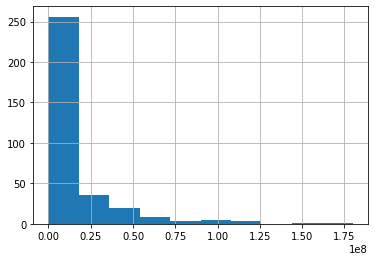

In [25]:
print(df['refundable_support'].describe())
df['refundable_support'].hist(bins=10)
plt.show()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64


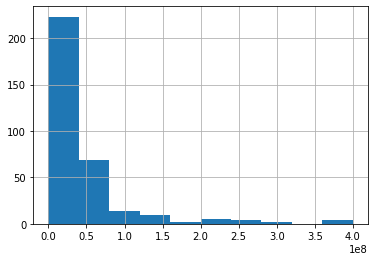

In [26]:
print(df['nonrefundable_support'].describe())
df['nonrefundable_support'].hist(bins=10)
plt.show()

In [27]:
df['nonrefundable_support'].value_counts().sort_values(ascending=False).sample(5)

50000000.0     11
24000000.0      2
250000000.0     3
10000000.0      4
35000000.0     29
Name: nonrefundable_support, dtype: int64

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64


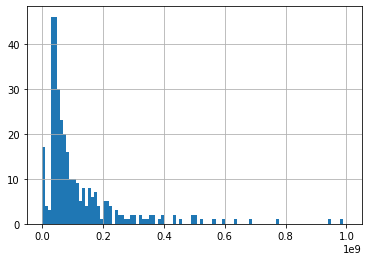

In [28]:
print(df['budget'].describe())
df['budget'].hist(bins=100, range=(0, 1000000000))
plt.show()

Много фильмов с бюджетом ноль

In [29]:
df[df['budget'] == 0].count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

Как видно на все фильмы с бюджетом выделялось бюджетное финансирование, значит бюджет должен быть больше/равен сумме возвратных и невозвратных субсидий. Надо проверить есть ли подобная особенность в других фильмах с гос. финансированием.

In [30]:
df.query('(refundable_support + nonrefundable_support) > budget').count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

Таких случаев, как и в прошлый раз 17, значит необходимо обработать только эти случаи.

Замена значений будет осуществляется при помощи функции, которая будет возвращать сумму гос. поддержки, если она будет больше бюджета.

In [31]:
def sum_support(refundable_support, nonrefundable_support, budget): 
    if refundable_support + nonrefundable_support > budget: 
        return refundable_support + nonrefundable_support
    else:
        return budget 

df['budget'] = df.apply(lambda x: sum_support(x['refundable_support'],
                                             x['nonrefundable_support'],
                                             x['budget']),
                                            axis=1
                       )
len(df.query('(refundable_support + nonrefundable_support) > budget'))

0

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Супер, что нашел строки с ошибочным бюджетом и принял решение заполнить. Только дальше в проекте мы рассчитываем долю государственной поддержки в бюджете, и теперь у этих фильмов доля гос.поддержки будет равна 1, а если мы посмотрим на остальные фильмы, то всегда только часть денег от общего бюджета фильма вложена государством. Важно это понимать и потом не сделать вывод, что некоторые фильмы полностью спонсировались государством, так как это ошибочное суждение.

</div>

Также проведенем проверку на наличие случаев при которых бюджет nan, но есть информация о гос. финансировании

In [32]:
len(df[(df['budget'].isna()) & ( 
    (df['refundable_support'] > 0) | 
    (df['nonrefundable_support'] > 0)
                            )])

0

Таких случаев больше нет. Получем обновленную статистику по бюджету и перестроем график

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64


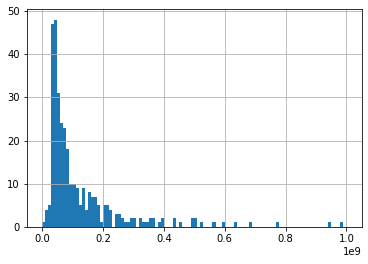

In [33]:
print(df['budget'].describe())
df['budget'].hist(bins=100, range=(0, 1000000000))
plt.show()

Других явных проблемных значений не выявлено.

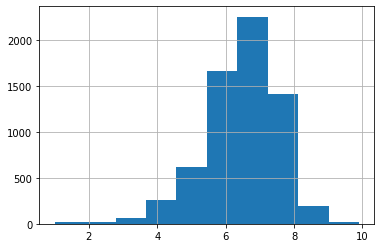

In [34]:
df['ratings'].hist(bins=10)
plt.show()

График представляет из себя нормальное распределение.

count    3.157000e+03
mean     7.650292e+07
std      2.403873e+08
min      0.000000e+00
25%      8.638600e+04
50%      2.330104e+06
75%      2.398312e+07
max      3.073569e+09
Name: box_office, dtype: float64


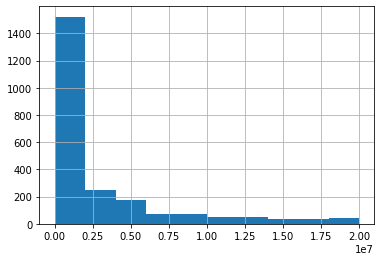

In [35]:
print(df['box_office'].describe())
df['box_office'].hist(bins=10, range=(0, 20000000))
plt.show()

Имеются фильмы чьи сборы составляют ноль или около того. Исходя из анализа ст.5.1 ФЗ от 22.08.1996 № 126-ФЗ (ред. от 01.04.2022) "О государственной поддержке кинематографии Российской Федерации" прокатное удостоверение преимущественно необходимо для публичной демонстрации фильма в коммерческих целях (за исключением телевидения), поэтому считаю, что сборы менее 50 тыс. руб. при получении фильмом прокатного удостоверения маловероятны, так как для некоммерческой публичной демонстрации фильмов, изначально не ориентированных на широкую аудиторию и коммерческий успех, прокатное удостоверение не требуется.

In [36]:
qw = [df['box_office'] < 50000]
len(df.loc[qw[0]])

716

Фильмов в прокате, собравших менее 50 тыс. рублей 717. Представляется необходимым указанным фильмам передать nan в колонке box_office. Удалять считаю не целесообразным так как тогда будут потеряны другие данные.

In [37]:
df.loc[qw[0], 'box_office'] = np.nan
qw_1 = [df['box_office'] < 50000]
len(df.loc[qw_1[0]])

0

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Молодец, что посмотрел как распределены все количественные данные, применив метод `describe()` и построив гистограммы.    

Для визуализации распределения данных часто еще используют диаграммы размаха, их можно построить методом [boxplot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

</div>

<div class="alert alert-warning">
<b> Комментарий ревьюера ⚠️ </b>

Ты привел логичное обоснование убрать из анализа сборы, которые составляют менее 50 тыс.руб. Но в данном случа мы теряем более 20% данных о сборах. Это надо понимать. В реальной работе такое можно будет сделать только после уточнения деталей и выяснения причин.
    
Например, если мы построим две диаграммы по суммарным сборам в каждый год, то увидим, что такие маленькие сборы в основном были по фильмам выходившим в прокат в 2010-2013 года. И если бы мы оставили эти данные то при дальнейшем анализе, можно было бы это заметить и выдвинуть гипотезу о том, например о том, что за период 2010-2013 данные о сборах вносились в тысячах рублей (или миллионах), а может в долларах — в любом случае информация нуждается в проверке.
    
</div>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [38]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [39]:
def first(x): 
    if type(x) == str: 
        return x.split(",")[0]
    else:
        return x
df['first_director'] = df['director'].apply(first)
df['first_genre'] = df['genres'].apply(first)
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre
2598,Упс... Ной уплыл!,124002415,2015-06-23 12:00:00+00:00,Анимационный,"Улиссес Филмпродуцион, Фабрик Димаж, Скилайн И...",Германия - Бельгия - Люксембург - Ирландия,"Тоби Генкель, Шон МакКормак","Яна Бол, Жан Гуссен, Эмели Кристианс",6+,NaN,NaN,NaN,NaN,6.1,"мультфильм,комедия,приключения",69348521.80,2015,Тоби Генкель,мультфильм
3150,Любите Куперов,121024715,2015-12-09 12:00:00+00:00,Художественный,"Си Би Эс Филмз, Граундсвелл Продакшнз, Имэджин...",США,Джесси Нельсон,"Брайан Грэйзер, Майкл Лондон, Джесси Нельсон",16+,NaN,NaN,NaN,NaN,6.4,"фэнтези,мелодрама,комедия",24670851.90,2015,Джесси Нельсон,фэнтези
2252,Домашнее видео,121014214,2014-07-03 12:00:00+00:00,Художественный,"Искейп Артистс, ЭлСтар Кэпитал, Медиа Райтс Кэ...",США,Джейк Касдан,"Тодд Блек, Джейсон Блюменталь, Стив Тиш",18+,NaN,NaN,NaN,NaN,5.5,"мелодрама,комедия",NaN,2014,Джейк Касдан,мелодрама
6280,Хэллфест,121022218,2018-10-11 12:00:00+00:00,Художественный,"Лайнсгейт, Такер Тули Интертейнмент, Вэлхала М...",США,Грегори Плоткин,"Алекс Гинно, Такер Тули, Гейл Энн Хёрд",18+,NaN,NaN,NaN,NaN,5.5,"ужасы,триллер",22801547.38,2018,Грегори Плоткин,ужасы
1864,Мисс Медоуз.,121002115,2015-02-11 12:00:00+00:00,Художественный,"Майриад Пикчерз, Роб Карлинер Продакшнз, Вайер...",СЩА,Карен Ли Хопкинс,"Эрик Бреннер, Роб Карлинер",16+,NaN,NaN,NaN,NaN,5.7,"триллер,драма,мелодрама",NaN,2015,Карен Ли Хопкинс,триллер


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [40]:
df['gov_support_percent'] = round((df['refundable_support'] + df['nonrefundable_support']) * 100 / df['budget'])
percent_null(df)
df[~(df['gov_support_percent'].isna())].sample(5)

                     name  count  percent
0                   title      0        0
1                puNumber      0        0
2         show_start_date      0        0
3                    type      0        0
4             film_studio      0        0
5      production_country      0        0
6                director      0        0
7                producer      0        0
8         age_restriction      0        0
9      refundable_support   7146       95
10  nonrefundable_support   7146       95
11                 budget   7146       95
12       financing_source   7146       95
13                ratings    966       12
14                 genres    975       13
15             box_office   5037       67
16                   year      0        0
17         first_director      0        0
18            first_genre    975       13
19    gov_support_percent   7146       95


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre,gov_support_percent
3504,День До,111010916,2016-07-06 12:00:00+00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",18+,25000000.0,25000000.0,90822766.0,Фонд кино,4.8,"драма,фантастика",NaN,2016,А.Котт,драма,55.0
3782,Мотылёк.,111001617,2017-03-22 12:00:00+00:00,Художественный,"ООО ""Кинокомпания КИТ""",Россия,К.Худяков,"Е.Бабенко, В.Ремизов",18+,7346881.0,30000000.0,63170000.0,"Министерство культуры, Фонд кино",8.0,драма,410058.00,2017,К.Худяков,драма,59.0
3785,Эластико,111016416,2016-10-18 12:00:00+00:00,Художественный,"ООО ""Пятый элемент"", ООО ""РЕНОВАЦИО интертейнм...",Россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",12+,0.0,15000000.0,30000000.0,Фонд кино,6.3,"спорт,мелодрама,криминал",19393384.34,2016,М.Расходников,спорт,50.0
3475,Петербург. Только по любви,111009516,2016-06-01 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,"А.Пармас, Н.Кудряшова, А.Гогленкова, Н.Назаров...","Э.Пичугин, С.Сельянов, Н.Дрозд, Н.Смирнова",16+,0.0,30000000.0,57874375.0,Министерство культуры,6.2,"комедия,мелодрама",16814329.46,2016,А.Пармас,комедия,52.0
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",67418974.80,2015,Д.Штурманова,комедия,100.0


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Добавление новых столбцов прошло успешно.

</div>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Не совсем понимаю, что значит данные о прокате, так как год есть для всех фильмов, если вопрос о сборах, то информация по ним имеется только в 67 процентах случаев.

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

Почему в 67%? Покажи, пожалуйста, как ты посчитал долю фильмов с информацией о сборах.
 
</div>

In [41]:
percent_null(df)

                     name  count  percent
0                   title      0        0
1                puNumber      0        0
2         show_start_date      0        0
3                    type      0        0
4             film_studio      0        0
5      production_country      0        0
6                director      0        0
7                producer      0        0
8         age_restriction      0        0
9      refundable_support   7146       95
10  nonrefundable_support   7146       95
11                 budget   7146       95
12       financing_source   7146       95
13                ratings    966       12
14                 genres    975       13
15             box_office   5037       67
16                   year      0        0
17         first_director      0        0
18            first_genre    975       13
19    gov_support_percent   7146       95


<div class="alert alert-info">
Я до этого использовал функцию percent_null(), которая задана в первой ячейке формата code.

<div class="alert alert-warning">
<b> Комментарий ревьюера 2 ⚠️ </b>

Понимаю, но твоя функция считает процент пропущенных значений, поэтому процент заполненных будет — 33%.

</div>

      title
year       
2017    505
2012    593
2011    622
2013    629
2015    703
2014    806
2016    817
2018    889
2019    930
2010    984


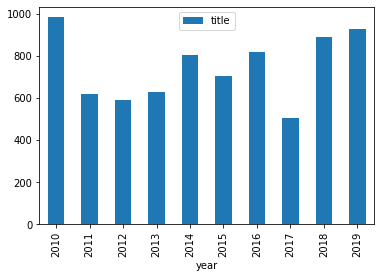

In [42]:
year_count = df.pivot_table(index='year', values='title', aggfunc='count')
print(year_count.sort_values(by='title'))
year_count.plot(kind='bar')
plt.show()

Больше всего фильмов в прокате присутствовало в 2010 году (985), а меньше всего в 2017 году (505).

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

В задании написано: ***«Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных»***
    
Что бы определить какой год представлен полнее в данных нам надо понимать какую долю составляют фильмы с указанной информацией в столбце `box_office` от общего количества фильмов (прокатных удостоверений) этого года. Так как не по всем прокатным удостоверением есть информация о сборах.
    
Попробуй, пожалуйста, посчитать эти доли в каждый год и посмотреть на изменение полноты данных о сборах.
    
</div>

<div class="alert alert-danger">
<b> Комментарий ревьюера 2 ❌</b>

По этому комментарию и остальным комментариям расположенным ниже — нет твоих доработок.
    
</div>

<div class="alert alert-info">
Я не сохранил окончательные изминения, прежде чем отправить проект на повторное ревью...

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

😞

</div>

   year    0  0_not_year  not_null    percent
9  2017  505         151       354  70.099010
5  2015  703         278       425  60.455192
3  2016  817         332       485  59.363525
1  2019  930         405       525  56.451613
2  2018  889         417       472  53.093363
4  2014  806         680       126  15.632754
6  2013  629         609        20   3.179650
8  2012  593         576        17   2.866779
7  2011  622         609        13   2.090032
0  2010  984         980         4   0.406504


<AxesSubplot:xlabel='year'>

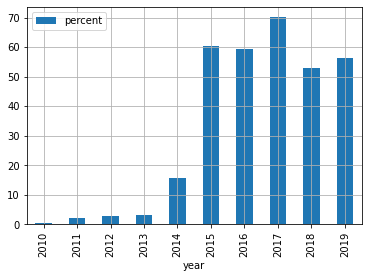

In [43]:
df_not_year = df[(df['box_office'].isna())].value_counts('year').reset_index()
df_year = df.value_counts('year').reset_index()
df_year = df_year.merge(df_not_year, on='year', suffixes=('', '_not_year'))
df_year['not_null'] = df_year['0'] - df_year['0_not_year']
df_year['percent'] = 100 - (df_year['0_not_year'] * 100 / df_year['0'])
print(df_year.sort_values(by='percent', 
                          ascending=False))
df_year.sort_values(by='year').plot(kind='bar' ,x='year', y='percent', grid = True)

<div class="alert alert-info">
C 2010 по 2014 информация о сборах представлена крайне скудно (от 0.4% до 15%), с 2015 по 2019 годы информация о сборах представлена более полно (от 60 до 70%). Наиболее полно представленный год - это 2017 (70%), однако затем происходит снижение показателя заполненности информации о сборах в 2018, 2019 гг. до 53% и 56% соответственно. Таким образом, имеется общая тенденция на увеличение заполненности показателя о сборах с течением времени, однако она не устойчива.

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

Верные наблюдения.

</div>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Интересно как распределились nan в колонке box_office по годам

In [44]:
df_not_year = df[(df['box_office'].isna())].value_counts('year').reset_index()
df_year = df.value_counts('year').reset_index()
df_year = df_year.merge(df_not_year, on='year', suffixes=('', '_not_year'))
df_year['not_null'] = df_year['0'] - df_year['0_not_year']
df_year['percent_nan'] = df_year['0_not_year'] * 100 / df_year['0']
df_year.sort_values(by='percent_nan', ascending=False)

,year,0,0_not_year,not_null,percent_nan
0,2010,984,980,4,99.593496
7,2011,622,609,13,97.909968
8,2012,593,576,17,97.133221
6,2013,629,609,20,96.820350
4,2014,806,680,126,84.367246
2,2018,889,417,472,46.906637
1,2019,930,405,525,43.548387
3,2016,817,332,485,40.636475
5,2015,703,278,425,39.544808
9,2017,505,151,354,29.900990


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Здесь ты как раз посчитал обратные доли — процент отсутствующих данных по сборам.

</div>

До 2014 года (включительно информация) о сборах отсутствует практически повсеместно, в остальных случаях уровень пропусков высок, что ставит под вопрос достоверность исследования в части изучения сборов.

Для проведения анализа данных целесообразно выделить отдельный датасет с 2015 по 2019 гг. и заполнить недостающие значения разными способами (медианой, средним и оставить как есть) в зависимости от года и построим соотвествующие графики. 

In [45]:
good_year = [2015, 2016, 2017, 2018, 2019]
df_good_box_office_med = df.query('year in @good_year').copy()
df_good_box_office_mean = df.query('year in @good_year').copy()
df_good_box_office_nan = df.query('year in @good_year').copy()

for i in good_year: 
    bool_list = [df_good_box_office_med['year'] == i]
    
    median = df_good_box_office_med.loc[bool_list[0], 'box_office'].median()
    df_good_box_office_med.loc[bool_list[0], 'box_office'] = df_good_box_office_med.loc[bool_list[0], 'box_office'].fillna(median)
    
    mean = df_good_box_office_mean.loc[bool_list[0], 'box_office'].mean()
    df_good_box_office_mean.loc[bool_list[0], 'box_office'] = df_good_box_office_mean.loc[bool_list[0], 'box_office'].fillna(mean)

<div class="alert alert-warning">
<b> Комментарий ревьюера ⚠️ </b>

По предупреждению:
    
- `SettingWithCopyWarning` — это предупреждение говорит о том, что данные добавляются в копию фрагмента датафрейма и не будут добавлены в исходный. Если создаешь такие копии, то можно использовать метод `copy()`, что бы предупреждения не всплывали.
    
`part = data.query(your_condition).copy()`
    
В твоем случае стоит применить метод `copy()`, когда ты первый раз определяешь переменные `df_good_box_office_med`, `df_good_box_office_mean`, `df_good_box_office_nan`.

</div>

<div class="alert alert-info">
Спасибо за совет, так и сделал! 

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

👍

</div>

        box_office
year              
2015  4.163198e+10
2016  4.958676e+10
2017  5.014032e+10
2019  5.035564e+10
2018  5.346325e+10


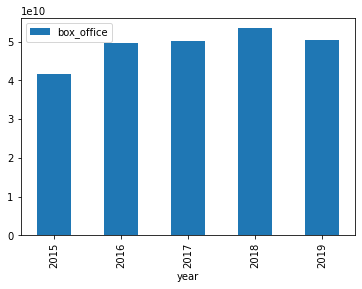

        box_office
year              
2015  6.533250e+10
2017  6.927863e+10
2016  8.063153e+10
2019  8.578247e+10
2018  9.354893e+10


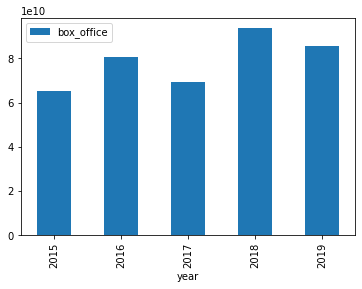

        box_office
year              
2015  3.949689e+10
2016  4.786572e+10
2019  4.842559e+10
2017  4.856364e+10
2018  4.966827e+10


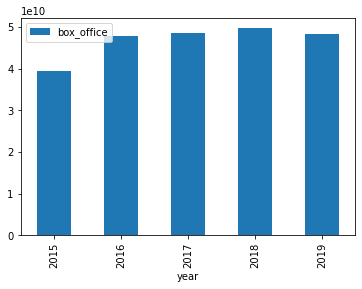

In [46]:
for i in [df_good_box_office_med, df_good_box_office_mean, df_good_box_office_nan]: 
    year_box_office = i.pivot_table(index='year', values='box_office', aggfunc='sum')
    print(year_box_office.sort_values(by='box_office'))
    year_box_office.plot(kind='bar')
    plt.show()

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Молодец, что для однотипных действий используешь цикл.
    
</div>

Как видно из представленных данных способ заполнения (не заполнения) пропусков кардинально не изменил результат (2018 год везде самый кассовый, а 2015 год наименее). 

При заполнении медианной значения распределены без серьезных перепадов от года к году и ближе к значению без замены (и также близки к данным, которые размещены на оф. сайте фонда кино), чем при заполнении средним, поэтому дальше для анализа будет применятся df_good_box_office_med.

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

Ты изначально посмотрел какой большой процент пропущенных значений в данных и заполнять пропуски медианой в таком случае не стоит — такое заполнение не сильно исказило картину сборов по годам, но может исказить результаты, когда мы будем сравнивать по другим параметрам (например, в разрезе возрастных категорий).
    
Лучше иметь меньший объем данных, но реальных, чем большой — но искусственно созданный.
    
</div>

<div class="alert alert-info">
Когда я решил оставить датафрейм, где пропуски заменены медианной - я исходил из того, что данные и так искажены в том смысле, 
что дальнейший анализ, рассчитан на сравнение кассовых сборов по годам, однако например если сравнить 2015 и 2017 года, то в первом 29% пропусков, а во втором 39% и года уже в неравных условиях хотя бы потому что крайние значения на выборку могут влиять сильнее, там где пропусков больше. То есть, когда мы сравниваем данные с разным количеством пропусков, то и результат сравнения тоже становится в определённой степени искусственным.
    
Этим я руководствовался.

<div class="alert alert-info">
Осуществил замену, анализируемого датасета на df_good_box_office_nan (тот, где не применялась замена)

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

Твоя логика понятна. Но, как я уже сказала,при большом количестве пропусков лучше оценивать реальные данные, так как сборы распределены очень неравномерно.

</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

              mean       median
        box_office   box_office
year                           
2015  9.293385e+07   7680197.50
2016  9.869220e+07   5183871.00
2017  1.371854e+08  10441608.00
2018  1.052294e+08   9100673.58
2019  9.223922e+07   4765559.50


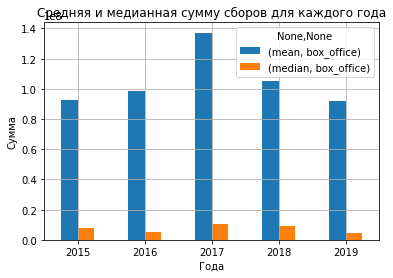

In [47]:
pivot_box_office = df_good_box_office_nan.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
print(pivot_box_office)
pivot_box_office.plot(kind='bar', grid = True)
plt.title('Средняя и медианная сумму сборов для каждого года')
plt.xlabel('Года')
plt.ylabel('Сумма')
plt.xticks(rotation = 'horizontal')
plt.show()

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

Молодец, что посчитал сразу средние и медианные значения сборов по годам с помощью сводной таблицы `pivot_table()` и построил наглядный график.
    
1. Можно добавить название и подписать оси, используя библиотеку `matplotlib`:
    
    `plt.title('Название гистограммы')`
    
    `plt.xlabel('Подпись оси x')`
    
    `plt.ylabel('Подпись оси y')`
    
    Можно еще добавить сетку, указав в методе `plot()` параметр `grid = True` — по ней легче оценить значения.
    
1. У этого графика не очень удобно читать года. Можно, используя библиотеку `matplotlib`, повернуть подписи оси x:
    
    `plt.xticks(rotation = 'horizontal')`

    Параметру `rotation` так же можно задавать угол наклона в градусах.
    
</div>

<div class="alert alert-danger">
<b> Комментарий ревьюера ❌</b>

Напиши, пожалуйста, вывод по этому пункту ответив на вопрос: «Почему средние значения так сильно отличаются от медианнных? В чем может быть причина?»
    
</div>

In [48]:
pivot_box_office.describe()

,mean,median
,box_office,box_office
count,5.000000e+00,5.000000e+00
mean,1.052560e+08,7.434382e+06
std,1.860003e+07,2.452946e+06
min,9.223922e+07,4.765560e+06
25%,9.293385e+07,5.183871e+06
50%,9.869220e+07,7.680198e+06
75%,1.052294e+08,9.100674e+06
max,1.371854e+08,1.044161e+07


<div class="alert alert-info">
Средние и медианные значения отличаются так сильно, потому что разброс между данными большой, что видно из разницы между min и max данных, а также разницей между квартилями

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

Ты абсолютно верно интерпретировал разницу между средними и медианными значениями. Выбросы влияют на расчет средних значений (в нашем случае сильно увеличивая), именно по этому для сравнения по категориям, лучше использовать медиану.
    
</div>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

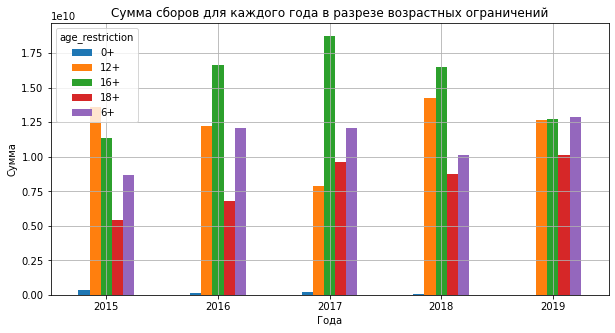

age_restriction,0+,12+,16+,18+,6+
year,,,,,
2015,3.790187e+08,1.361588e+10,1.136801e+10,5.432185e+09,8.701793e+09
2016,1.501353e+08,1.220424e+10,1.666448e+10,6.793794e+09,1.205307e+10
2017,2.295989e+08,7.851357e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426721e+10,1.650360e+10,8.760039e+09,1.010497e+10
2019,1.774607e+07,1.268019e+10,1.275335e+10,1.012180e+10,1.285251e+10


In [49]:
pivot_age = df_good_box_office_nan.pivot_table(index='year', columns = 'age_restriction', values='box_office', aggfunc='sum')
pivot_age.plot(kind='bar', 
              figsize=(10, 5),
              grid=True)
plt.title('Cумма сборов для каждого года в разрезе возрастных ограничений')
plt.xlabel('Года')
plt.ylabel('Сумма')
plt.xticks(rotation = 'horizontal')
plt.show()
pivot_age

Как видно из графика категории фильмов по сумме касовых сборов расположены следующим образом (в порядке убывания): 
- "16+" при пике сборов в 2017 году; 
- "12+" при пике сборов в 2018 году; 
- "6+" при пике сборов в 2019 году; 
- "18+" при пике сборов в 2019 году; 

Меньше всего сборов для фильмов категории "0+". 

<div class="alert alert-warning">
<b> Комментарий ревьюера ⚠️ </b>

Кроме суммарных сборов для сравнения категорий можно посчитать медианные, так как за суммой мы не видим количества фильмов, а для некоторых возрастных категорий (например 0+) количество фильмов значительно меньше, что и служит причиной небольших суммарных сборов.

</div>

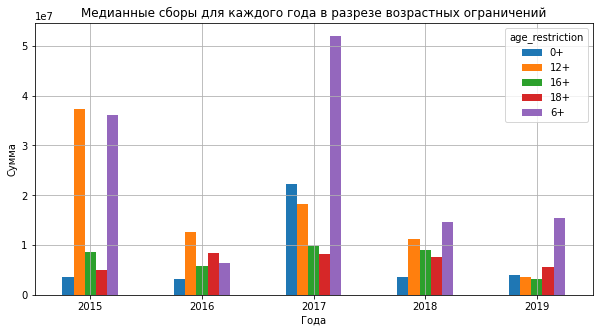

age_restriction,0+,12+,16+,18+,6+
year,,,,,
2015,3517006.50,3.729279e+07,8582874.400,5034342.400,36128225.50
2016,3133221.41,1.257782e+07,5686963.270,8355972.765,6403874.20
2017,22178956.00,1.829921e+07,9702077.000,8212677.000,51992103.00
2018,3616937.28,1.113868e+07,9010638.625,7604029.000,14688850.32
2019,3885434.50,3.498501e+06,3237407.000,5603216.550,15523879.43


In [50]:
pivot_age = df_good_box_office_nan.pivot_table(index='year', columns = 'age_restriction', values='box_office', aggfunc='median')
pivot_age.plot(kind='bar', 
              figsize=(10, 5),
              grid=True)
plt.title('Медианные сборы для каждого года в разрезе возрастных ограничений')
plt.xlabel('Года')
plt.ylabel('Сумма')
plt.xticks(rotation = 'horizontal')
plt.show()
pivot_age

<div class="alert alert-info">
Если сравнивать медианные значения, то выводы не так однозначны: фильмы категории 6+ самые коммерчески успешные, затем идет 12+, 0+, затем остальные

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

Да, хорошо, посмотреть под разными углами: фильмы 6+ стабильно хорошо собирают в прокате. А вот видимо в категории 12+ и 16+ бывают супер успешные фильмы, но много и провальных.
    
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [51]:
df_gov = df[~(df['refundable_support'].isna()) | ~(df['nonrefundable_support'].isna())]
print(percent_null(df_gov))
df_gov.shape

                     name  count  percent
0                   title      0        0
1                puNumber      0        0
2         show_start_date      0        0
3                    type      0        0
4             film_studio      0        0
5      production_country      0        0
6                director      0        0
7                producer      0        0
8         age_restriction      0        0
9      refundable_support      0        0
10  nonrefundable_support      0        0
11                 budget      0        0
12       financing_source      0        0
13                ratings     16        4
14                 genres     16        4
15             box_office     23        6
16                   year      0        0
17         first_director      0        0
18            first_genre     16        4
19    gov_support_percent      0        0
None


(332, 20)

Всего таких фильмов 332 в датафрейме. Для удобства добавим новый столбец с общей суммой гос. поддержки.

In [52]:
df_gov['gov_support_total'] = df_gov['refundable_support'] + df_gov['nonrefundable_support']

/tmp/ipykernel_85/3525829901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gov['gov_support_total'] = df_gov['refundable_support'] + df_gov['nonrefundable_support']


В датафрейме данные привязаны к дате выхода фильма, цикл производства каждого из которых может серьезно разнится, поэтому пологаю, что нет смысла устраивать разрезы по годам

Изучим данные в разрезе видов фильмов, возрастных ограничений, жанров:

In [53]:
for i in ['type', 'age_restriction', 'first_genre']:
    print(df_gov.pivot_table(index=i, 
                             values=['ratings', 'title'], 
                             aggfunc={'ratings':'mean', 
                                      'title':'count'
                                      }
                            ).sort_values(by='title', ascending=False )
         )

                 ratings  title
type                           
Художественный  6.042456    300
Анимационный    5.750000     31
Документальный  8.000000      1
                  ratings  title
age_restriction                 
16+              5.952893    125
12+              6.044444    106
6+               5.969841     65
18+              6.265385     28
0+               6.414286      8
              ratings  title
first_genre                 
драма        6.419355     93
комедия      5.514865     74
мультфильм   5.800000     31
триллер      5.706667     15
мелодрама    5.953333     15
фантастика   6.145455     11
фэнтези      6.090909     11
ужасы        5.200000     10
военный      6.466667      9
приключения  5.871429      7
семейный     5.414286      7
боевик       6.583333      6
детектив     6.760000      5
история      5.350000      4
детский      7.125000      4
мюзикл       6.550000      4
криминал     7.500000      3
спорт        6.933333      3
биография    6.900000      3


При гос. поддержке чаще всего снимают художественное кино (279), затем со значительным отставанием следует анимационные произведения (30). Из художественного по жанрам чаще снимают: драмы (84), комедии (73), триллеры (15).

In [54]:
df_gov.groupby('film_studio').agg({'title':'count'}).value_counts()

title
1        226
2         25
3          7
4          4
6          2
7          1
dtype: int64

226 студиям оказана гос. поддержка по 1 разу, 25 студиям по 2 раза, 7 студиям по 3 раза, 4 студиям по 4 раза, 2 студиям - 6 раз и только одной студии 7 раз.

Так я планирую осуществить анализ деятельности в том числе и студий в финансовой плоскосте с учетом сведений о прокате, поэтому для более корректных результатов удалим фильмы без box_office

In [55]:
df_gov = df_gov.dropna(subset=['box_office'])
df_gov.shape

(309, 21)

In [56]:
print( 'Общая сумма гос. поддержки {0:,} млн. руб.'.format(int(df_gov['gov_support_total'].sum() / 1000000)).replace(',', ' '))
print('Средняя сумма гос. поддержки {0:,} млн. руб.'.format(int(df_gov['gov_support_total'].mean() / 1000000)).replace(',', ' '))
print('Медианная сумма гос. поддержки {0:,} млн. руб.'.format(int(df_gov['gov_support_total'].median() / 1000000)).replace(',', ' '))

print('')
print('Средняя оценка фильмов с гос. поддержкой', df_gov['ratings'].mean().round(1))
print('Средняя оценка фильмов без таковой', 
      df[(df['refundable_support'].isna()) & (df['nonrefundable_support'].isna())]['ratings'].mean().round(1))
print('Средний процент участия гос. финансирования в бюджете фильма', df_gov['gov_support_percent'].mean().round(1))

print('')
print('Общая сумма выделенных возвратных средств {0:,} млн. руб.'.format(int(df_gov['refundable_support'].sum() / 1000000)).replace(',', ' '))
print('Средняя сумма выделенных возвратных средств {0:,} млн. руб.'.format(int(df_gov['refundable_support'].mean() / 1000000)).replace(',', ' '))
print('Медианная сумма выделенных возвратных средств {0:,} млн. руб.'.format(int(df_gov['refundable_support'].median() / 1000000)).replace(',', ' '))


print('')
print('Общая сумма выделенных невозвратных средств {0:,} млн. руб.'.format(int(df_gov['nonrefundable_support'].sum() / 1000000)).replace(',', ' '))
print('Общая сумма выделенных невозвратных средств {0:,} млн. руб.'.format(int(df_gov['nonrefundable_support'].mean() / 1000000)).replace(',', ' '))
print('Медианная сумма выделенных невозвратных средств {0:,} млн. руб.'.format(int(df_gov['nonrefundable_support'].median() / 1000000)).replace(',', ' '))

print('')
print('Процент невозвратных средств поддержки к общей сумме поддержки {0:.1f} %'.format(df_gov['refundable_support'].sum() * 100 / 
                                                                   df_gov['gov_support_total'].sum()))

print('Общая сумма бюджетов фильмов {0:,} млн. руб. '.format(int(df_gov['budget'].sum() / 1000000)).replace(',', ' '))
print('Общая сумма проката фильмов {0:,} млн. руб.'.format(int(df_gov['box_office'].sum() / 1000000)).replace(',', ' '))
print('Убыток* {0:,} млн. руб.'.format(int(
                            (df_gov['box_office'].sum() - df_gov['budget'].sum()) / 1000000
                        )
                    ).replace(',', ' ')
     )



Общая сумма гос. поддержки 19 036 млн. руб.
Средняя сумма гос. поддержки 61 млн. руб.
Медианная сумма гос. поддержки 35 млн. руб.

Средняя оценка фильмов с гос. поддержкой 6.0
Средняя оценка фильмов без таковой 6.5
Средний процент участия гос. финансирования в бюджете фильма 54.1

Общая сумма выделенных возвратных средств 3 774 млн. руб.
Средняя сумма выделенных возвратных средств 12 млн. руб.
Медианная сумма выделенных возвратных средств 0 млн. руб.

Общая сумма выделенных невозвратных средств 15 262 млн. руб.
Общая сумма выделенных невозвратных средств 49 млн. руб.
Медианная сумма выделенных невозвратных средств 30 млн. руб.

Процент невозвратных средств поддержки к общей сумме поддержки 19.8 %
Общая сумма бюджетов фильмов 41 497 млн. руб. 
Общая сумма проката фильмов 42 113 млн. руб.
Убыток* 615 млн. руб.


*Здесь и далее убытком будет называется разница отрицательная разница между бюджетом и прокатом.

<div class="alert alert-warning">
<b> Комментарий ревьюера ⚠️ </b>

При расчете средней и медианной суммы государственной поддержки (возвратной и невозвратной) стоит учесть, что в некоторых случаях оказывался только один тип поддержки (например, только возвратная или только невозвратная), поэтому можно посчитать средние и медианные значения поддержки, отбросив случаи (то есть строки с нулями), когда данный тип поддержки не оказывался.
    
</div>

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
   
Интересно сравнить рейтинги фильмов с государственной поддержкой и без нее.
    
</div>

Изучим данные о предоставлении финансирования в разрезе студий.

In [57]:
pivot_film_studio = df_gov.pivot_table(index='film_studio', 
                                  values=['ratings', 'title', 'gov_support_total', 
                                         'nonrefundable_support', 'box_office', 'budget'], 
                                aggfunc={'ratings':'mean', 
                                         'title':'count', 
                                         'gov_support_total':'sum', 
                                         'budget':'sum',
                                         'nonrefundable_support':'sum', 
                                         'box_office':'sum'
                                          }
                                    ).sort_values(by='title', ascending=False)

# Ппроцент не возвратных субсидий

pivot_film_studio['percent_nonrefun'] = (pivot_film_studio['nonrefundable_support'] * 100  /
                                        pivot_film_studio['gov_support_total']) 

# Процент гос. финансирования в общей сумме бюджетов фильмов

pivot_film_studio['percent_total_support_in_budget'] = (pivot_film_studio['gov_support_total'] * 100  /
                                        pivot_film_studio['budget'])

# Абсолютные значения прибыли (убытка)

pivot_film_studio['pay_back'] = (
                                 (pivot_film_studio['box_office'] - pivot_film_studio['budget'])
                                )

# Процент прибыли (убытка)

pivot_film_studio['pay_back_percent'] = (
                                 (pivot_film_studio['box_office'] - pivot_film_studio['budget']) * 100  /
                                        pivot_film_studio['budget']
                                )

# Переведем часть значений в миллионы для удобства восприятия

for i in ['box_office', 'budget', 'gov_support_total', 'nonrefundable_support', 'pay_back']: 
    pivot_film_studio[i] = pivot_film_studio[i] / 1000000



In [58]:
pivot_film_studio.head(5)

,box_office,budget,gov_support_total,nonrefundable_support,ratings,title,percent_nonrefun,percent_total_support_in_budget,pay_back,pay_back_percent
film_studio,,,,,,,,,,
"ООО ""Студия анимационного кино ""Мельница""",2890.370003,1512.454214,630.0,365.0,6.314286,7,57.936508,41.654154,1377.915789,91.104628
"ООО ""ТаББаК""",2665.883723,1095.888584,688.0,534.0,5.000000,6,77.616279,62.780105,1569.995139,143.262295
"ООО ""Кинокомпания ""СТВ""",95.357902,534.960608,190.0,190.0,6.183333,6,100.000000,35.516634,-439.602706,-82.174781
"ООО ""ВИЗАРТ ФИЛЬМ""",638.521185,1187.730183,470.0,260.0,6.200000,4,55.319149,39.571277,-549.208998,-46.240216
"ООО ""Каро Продакшн""",25.999824,280.271609,152.5,127.5,5.375000,4,83.606557,54.411505,-254.271785,-90.723347


7 раз поддержка оказана студии ООО "Студия анимационного кино "Мельница" на сумму 630 млн. руб., что составляет 41% от совокупного бюджета всех фильмов данной студии. 58% поддержки невозвратная.

6 раз поддержка оказана студии ООО "Кинокомпания "СТВ" на сумму 190 млн. руб., что составляет 35% от совокупного бюджета всех фильмов данной студии. 100% поддержки невозвратная. По данным датафрейма совокупный убыток фильмов студии 82% от их бюджетов (439 млн. рублей).

6 раз поддержка оказана студии ООО "ТаББаК" на сумму 688 млн. руб., что составляет 62% от совокупного бюджета всех фильмов данной студии. 77% поддержки невозвратная.

In [59]:
pivot_film_studio.sort_values('gov_support_total', ascending=False).head(5)

,box_office,budget,gov_support_total,nonrefundable_support,ratings,title,percent_nonrefun,percent_total_support_in_budget,pay_back,pay_back_percent
film_studio,,,,,,,,,,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",4181.941534,1225.476058,842.104482,792.104482,7.550000,2,94.062494,68.716518,2956.465476,241.250366
"ООО ""Нон-Стоп Продакшн""",508.282068,1405.194094,840.000000,690.000000,6.433333,3,82.142857,59.778219,-896.912026,-63.828337
"ООО ""ТаББаК""",2665.883723,1095.888584,688.000000,534.000000,5.000000,6,77.616279,62.780105,1569.995139,143.262295
"ООО ""Студия анимационного кино ""Мельница""",2890.370003,1512.454214,630.000000,365.000000,6.314286,7,57.936508,41.654154,1377.915789,91.104628
"ЗАО ""Дирекция кино""",717.703186,980.000000,500.000000,400.000000,6.000000,1,80.000000,51.020408,-262.296814,-26.764981


Больше всего государственной поддержки выделено ООО "Студия "ТРИТЭ" Никиты Михалкова", суммарно 842 млн. рублей на 2 фильма. Государственная поддержка составила 68% от бюджетов данных фильмов. 94% поддержки невозвратная.

На втором месте по получению гос. финансирования ООО "Нон-Стоп Продакшн". 840 млн. руб. выделено данной студии на 3 фильма, что составляет 60% от их суммарного бюджета. 82% поддержки невозвратная.

На третьем месте по получению гос. финансирования ООО "ТаББаК".

In [60]:
pivot_film_studio.sort_values(by='pay_back', ascending=False).tail(5)

,box_office,budget,gov_support_total,nonrefundable_support,ratings,title,percent_nonrefun,percent_total_support_in_budget,pay_back,pay_back_percent
film_studio,,,,,,,,,,
"ООО ""ТПО ""РОК"", ООО ""Матильда""",511.775548,1032.905957,300.0,190.0,7.700000,1,63.333333,29.044270,-521.130409,-50.452842
"ООО ""ВИЗАРТ ФИЛЬМ""",638.521185,1187.730183,470.0,260.0,6.200000,4,55.319149,39.571277,-549.208998,-46.240216
"НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств, ООО ""Жан Виго Италия"" (Jean Vigo Italia S.R.L.)",54.243203,779.941965,60.0,60.0,6.900000,1,100.000000,7.692880,-725.698762,-93.045226
"ООО ""Нон-Стоп Продакшн""",508.282068,1405.194094,840.0,690.0,6.433333,3,82.142857,59.778219,-896.912026,-63.828337
"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""РФГ""; АО ""Маринс Групп Интертеймент""; ООО ""Фетисов Иллюзион""; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд.",333.597060,2305.074303,270.0,90.0,5.800000,1,33.333333,11.713288,-1971.477243,-85.527709


В абсолютном значении самый убыточный показатель демонстрирует ООО "ТПО "РОК", ООО "Матильда" (1 фильма). При суммарном бюджете в 1 032 млн. руб. (процент гос. средств - 29) убыток 521 млн (50%).,

Следом идет ОООО "ВИЗАРТ ФИЛЬМ" (4 фильма). При суммарном бюджете в 1 187 млн. руб. (процент гос. средств - 39) убыток 521 млн (50%).



In [61]:
pivot_film_studio = pivot_film_studio.reset_index()
print(len(pivot_film_studio.query('pay_back_percent < 0')))
print(len(pivot_film_studio.query('(pay_back_percent < - 50) & (percent_total_support_in_budget > 50)')))
print(len(pivot_film_studio.query('(pay_back_percent < - 50) & (percent_total_support_in_budget > 90)')))

183
106
3


183 студиями допущен убыток, 106 допущен убыток более 50 процентов от бюджета фильма при участии гос. финансирования более 50%. 3 из указанных студий допущен указанный убыток при участии гос. финансирования более 90%. Возможно рассматривать это, как основание для проведения проверки деятельности студий и принятию доп. мер в рамках бюджетного контроля.

In [62]:
df_gov.corr()

,refundable_support,nonrefundable_support,budget,ratings,box_office,year,gov_support_percent,gov_support_total
refundable_support,1.000000,0.312677,0.635493,0.010406,0.309634,0.079046,0.005549,0.615339
nonrefundable_support,0.312677,1.000000,0.587272,0.146585,0.453452,0.104274,0.142967,0.941141
budget,0.635493,0.587272,1.000000,0.102416,0.372623,0.160195,-0.294566,0.713506
ratings,0.010406,0.146585,0.102416,1.000000,0.145410,0.034867,-0.063281,0.125230
box_office,0.309634,0.453452,0.372623,0.145410,1.000000,0.110195,-0.080331,0.486493
year,0.079046,0.104274,0.160195,0.034867,0.110195,1.000000,-0.087622,0.114663
gov_support_percent,0.005549,0.142967,-0.294566,-0.063281,-0.080331,-0.087622,1.000000,0.120619
gov_support_total,0.615339,0.941141,0.713506,0.125230,0.486493,0.114663,0.120619,1.000000


<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
    
Для визуализации матрицы корреляций хорошо подходит тепловая карта, которую можно построить применив метод [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) библиотеки `seaborn`.

</div>

<AxesSubplot:>

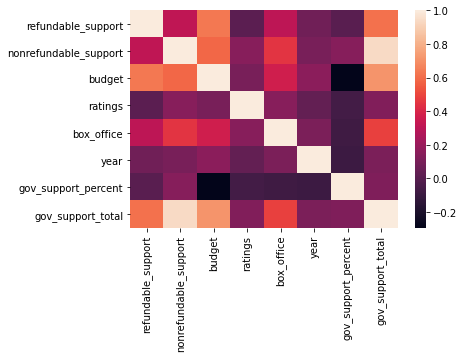

In [63]:
sb.heatmap(df_gov.corr())

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>
    
Если добавить параметр `annot = True` на графике будут отображаться значения коэффициента корреляции.
    
</div>

Корреляция подтверждает высокую зависимость бюджета фильмов от гос. поддержки (0.71)

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
    
Так как поддержка является частью бюджета, логично что зависимость между этими величинами будет. Тут конечно вопрос, как происходит процесс — сначала утверждается бюджет, только потом запрашивается поддержка от государства или иной подход.
    
Интереснее посмотреть зависимость между бюджетом и сборами, между бюджетом и рейтингом.

</div>

<div class="alert alert-warning">
<b> Комментарий ревьюера ⚠️ </b>

Результаты расчетов лучше воспринимаются по графикам. Поэтому, будет очень хорошо, если ты дополнишь исследование фильмов с государственной поддержкой визуализациями.

</div>

<div class="alert alert-info">
Имеется определенная корреляция между бюджетами и сборами фильмов (0.37), однако корреляция между бюджетом и рейтингами низкая (0.1), возможно потому, что большим бюджетом и рекламой можно завлечь зрителя, однако на оценку зрителя соотношения ожиданий от фильма (которые при больших бюджетах больше) и его качеством.

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>

Правильно интерпретировать полученный коэффициент может помочь шкала Чеддока. Если кратко, то интерпретация такая:
    
|Значение|Интерпретация|
|:------:|:-----------:|
|от 0 до 0,3|очень слабая|
|от 0,3 до 0,5|слабая|
|от 0, 5 до 0,7|средняя|
|от 0,7 до 0,9|высокая|
|от 0,9 до 1|очень высокая|
  
</div>

### Шаг 5. Напишите общий вывод

Больше всего фильмов в прокате присутствовало в 2010 году (985), а меньше всего в 2017 году (505).

2018 год самый кассовый, а 2015 год наименее.

Категории фильмов по сумме касcовых сборов расположены следующим образом (в порядке убывания):
"16+" при пике сборов в 2017 году;
"12+" при пике сборов в 2018 году;
"6+" при пике сборов в 2019 году;
18+" при пике сборов в 2019 году;
Меньше всего сборов для фильмов категории "0+".

При гос. поддержке чаще всего снимают художественное кино (279), затем со значительным отставанием следует анимационные произведения (30). Из художественного по жанрам чаще снимают: драмы (84), комедии (73), триллеры (15).

226 студиям оказана гос. поддержка по 1 разу, 25 студиям по 2 раза, 7 студиям по 3 раза, 4 студиям по 4 раза, 2 студиям - 6 раз и только одной студии 7 раз.

Фильмы, созданные при гос. поддержке. 
Общая сумма гос. поддержки 19 036 млн. руб.
Средняя сумма гос. поддержки 61 млн. руб.
Медианная сумма гос. поддержки 35 млн. руб.

Средняя оценка фильмов 6.0
Средняя оценка фильмов без таковой 6.5
Средний процент участия гос. финансирования в бюджете фильма 54.1

Общая сумма выделенных возвратных средств 3 774 млн. руб.
Средняя сумма выделенных возвратных средств 12 млн. руб.
Медианная сумма выделенных возвратных средств 0 млн. руб.

Общая сумма выделенных невозвратных средств 15 262 млн. руб.
Общая сумма выделенных невозвратных средств 49 млн. руб.
Медианная сумма выделенных невозвратных средств 30 млн. руб.

Процент невозвратных средств поддержки к общей сумме поддержки 19.8 %
Общая сумма бюджетов фильмов 41 497 млн. руб. 
Общая сумма проката фильмов 42 113 млн. руб.
Общий убыток фильмов, созданных при гос. финансировании 615 млн. руб.
*Здесь и далее убытком будет называется разница отрицательная разница между бюджетом и прокатом.

7 раз поддержка оказана студии ООО "Студия анимационного кино "Мельница" на сумму 630 млн. руб., что составляет 41% от совокупного бюджета всех фильмов данной студии. 58% поддержки невозвратная.
6 раз поддержка оказана студии ООО "Кинокомпания "СТВ" на сумму 190 млн. руб., что составляет 35% от совокупного бюджета всех фильмов данной студии. 100% поддержки невозвратная. По данным датафрейма совокупный убыток фильмов студии 82% от их бюджетов (439 млн. рублей).
6 раз поддержка оказана студии ООО "ТаББаК" на сумму 688 млн. руб., что составляет 62% от совокупного бюджета всех фильмов данной студии. 77% поддержки невозвратная.

Больше всего государственной поддержки выделено ООО "Студия "ТРИТЭ" Никиты Михалкова", суммарно 842 млн. рублей на 2 фильма. Государственная поддержка составила 68% от бюджетов данных фильмов. 94% поддержки невозвратная.
На втором месте по получению гос. финансирования ООО "Нон-Стоп Продакшн". 840 млн. руб. выделено данной студии на 3 фильма, что составляет 60% от их суммарного бюджета. 82% поддержки невозвратная.
На третьем месте по получению гос. финансирования ООО "ТаББаК".

В абсолютном значении самый убыточный показатель демонстрирует ООО "ТПО "РОК", ООО "Матильда" (1 фильма). При суммарном бюджете в 1 032 млн. руб. (процент гос. средств - 29) убыток 521 млн (50%).,
Следом идет ОООО "ВИЗАРТ ФИЛЬМ" (4 фильма). При суммарном бюджете в 1 187 млн. руб. (процент гос. средств - 39) убыток 521 млн (50%).

183 студиями допущен убыток, 106 допущен убыток более 50 процентов от бюджета фильма при участии гос. финансирования более 50%. 3 из указанных студий допущен указанный убыток при участии гос. финансирования более 90%. Возможно рассматривать это, как основание для проведения проверки деятельности студий и принятию доп. мер в рамках бюджетного контроля.

Корреляция подтверждает высокую зависимость бюджета фильмов от гос. поддержки (0.71)


<div class="alert alert-info">
Рекомендации: 

- так как процент возвратных средств от общей суммы выделенного финансирования состовляет всего 19.8% представляется необходимым разработать и внедрить механизм увеличения процента возвратных средств при коммерческом успехе фильма; 
    
- рассмотреть вопрос о принятии мер бюджетного контроля в отношении студий допустивших убыток в прокате при участии гос. финансирования.

<div class="alert alert-success">
<b> Комментарий ревьюера 3 ✅ </b>
    
Оставляя рекомендации, ты показываешь заказчику, что постарался изучать данные опираясь на его запросы и с пониманием его проблем и целей.
    
</div>

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
    
Хороший вывод, его можно оформить более тезисно и красиво, для этого воспользоваться возможностями ячеек Markdown:
    
- создавать нумерованные и ненумерованные списки;
    
- выделять текст **жирным** или *курсивом*;
    
- использовать `моноширинный текст`;
    
- и многое другое.
    
Больше рекомендаций по оформлению проекта есть в тренажере — дополнительный спринт «Полезные инструкции для учебы», тема «Оформление проекта», урок «Рекомендации по выполнению проектов».
    
Очень хорошо, когда кроме результатов анализа в выводе есть несколько рекомендаций ориентированных на заказчика исследования. Как мы знаем из описания: «Заказчик этого исследования — Министерство культуры Российской Федерации»
   
</div>

**Заключительный комментарий ревьюера:**

Ты проделал большую работу, но есть некоторые детали, которые надо поправить:

<div class="alert alert-danger">
    
1. Проверить все ли данные вошли в объединенный датафрейм.
    
1. Проверить столбцы с потенциально уникальными значениями на дубликаты.
    
1. Рассмотреть все категориальные столбцы. Ответить на вопросы: «Какая общая проблема встречается почти во всех категориальных столбцах? В каких столбцах нет такой проблемы?»
    
1. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах от количества выданных прокатных удостоверений за каждый год. Проанализировать, как эта доля менялась по годам.
    
1. Не заполнять пропуски в столбце со сборами медианой.
    
1. Ответить на вопрос: «Почему мы видим что средние значения сборов так отличаются от медианных?»
    
</div>

На твое усмотрение, можно:

<div class="alert alert-warning">
    
1. При удалении аномальных значений, считать процент отбрасываемых данных и уточнять причины появления таких значений.
    
1. Использовать метод `copy()` при сохранении фрагмента датафрейма в новой переменной.
    
1. Посчитать медианные сборы по возрастным категориям.
    
1. При расчете средних и медианных значений поддержки учесть, что в некоторых случаях оказывается только один тип поддержки (только возвратная или только невозвратная).
    
1. Дополнить исследование фильмов с государственной поддержкой визуализациями.
    
</div>

Прочие полезности:

<div class="alert alert-success">

1. Добавить цель работы и информацию об источниках исходных данных, описывать действия на каждом шаге своими словами.
    
1. Сохранять импорты всех библиотек и настроек формата вывода данных в отдельную ячейку в начале проекта.
    
1. Выводить количественные данные в удобном формате с помощью метода `pd.options.display.float_format = '{:.2f}'.format`.
    
1. Удалять нерабочий код, а не превращать в комментарии.
    
1. Проверить рейтинги, записанные в процентах, на соответствие реальным рейтингам фильмов.
    
1. Для удаления пробелов в начале и конце строковых значений по всему столбцу использовать метод `str.strip()`
    
1. Обратить внимание на то, что во всех представленных фильмах с государственной поддержкой доля этой поддержки меньше 1.
    
1. Для визуализации распределения данных построить диаграммы размаха методом `boxplot()`.
    
1. Добавлять на все графики названия и подписи осей, по желанию — сетку.
       
1. Повернуть подписи оси Х, используя `plt.xticks()` с параметром `rotation`.
    
1. Сравнить рейтинги фильмов с поддержкой и без нее.
    
1. Для визуализации матрицы корреляций построить тепловую карту методом `heatmap()` библиотеки `seaborn`.
    
1. Оценить зависимость между бюджетом и сборами, между бюджетом и рейтингом.
    
1. Использовать больше возможностей ячеек Markdown при оформлении проекта.
    
1. Дополнить общий вывод рекомендациями, интересными для заказчика.
    
</div>

Возвращаю проект тебе на доработку и жду его на повторное ревью. Если есть какие то вопросы — смело задавай их.

**Заключительный комментарий ревьюера 2:**

Возможно, ты отправил не тот файл, но доработок начиная с пункта «Исследовательский анализ данных» нет, что бы я могла принять проект:

<div class="alert alert-danger">
    
Нужно внести корректировки по всем комментариям, выделенным красным цветом.
    
</div>

Возвращаю проект на доработку и жду его обратно, на ревью. Если у тебя появились какие-то вопросы, напиши их, пожалуйста, в комментарии и я постараюсь детально на них ответить.

**Заключительный комментарий ревьюера 3 :**

Спасибо, что внимательно отнесся к моим комментариям и доработал проект. Он принят.

Я добавила еще некоторые пояснения и рекомендации.

Надеюсь, все мои комментарии были понятны, а советы — полезны.

Успехов в дальнейшем обучении ✨